In [1]:
import bmxdata
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import signal
from numpy.fft import rfft

In [2]:
fname = '/astro/u/anze/bmxdata/raw/2010/201008_2100_D1.data'
da=bmxdata.BMXFile(fname)

In [3]:
sig=da.data['chan4_0']

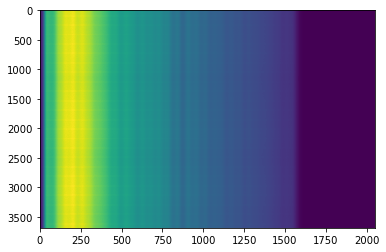

In [4]:
plt.imshow(sig,aspect='auto')

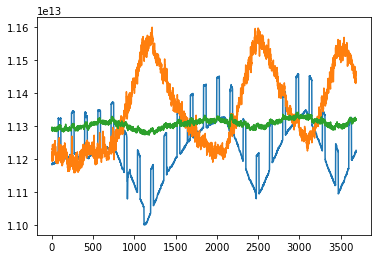

In [5]:
plt.plot(sig[:,100:1500].mean(axis=1)*0.27)
plt.plot(sig[:,1800:].mean(axis=1)*2.5e2)
plt.plot(sig[:,1720:1780].mean(axis=1)*2.7e2)


In [6]:
sigavg = np.outer(np.ones(len(sig)),sig.mean(axis=0))
signorm = sig / sigavg -1 

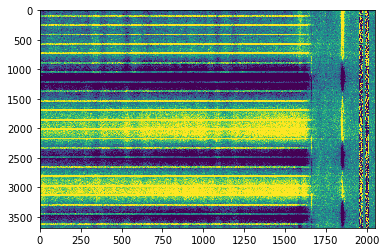

In [7]:
plt.imshow(signorm[:,:],aspect='auto',vmin=-0.01,vmax=0.01)

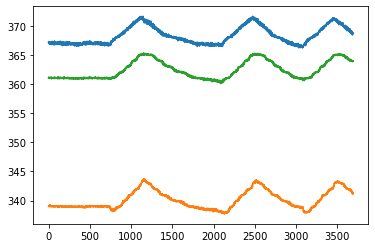

In [8]:
t1 = da.data['temp_fgpa'][:,1]
t2 = da.data['temp_frontend'][:,1]
t3 = da.data['temp_adc'][:,1]
plt.plot(t1,label='fgpa')
plt.plot(t2,label='frontend')
plt.plot(t3,label='adc')

dt1 = t1/t1.mean() - 1
dt2 = t2/t2.mean() - 1
dt3 = t3/t3.mean() - 1
sig1 = signorm[:,100:900].mean(axis=1)
sig2 = signorm[:,900:1500].mean(axis=1)

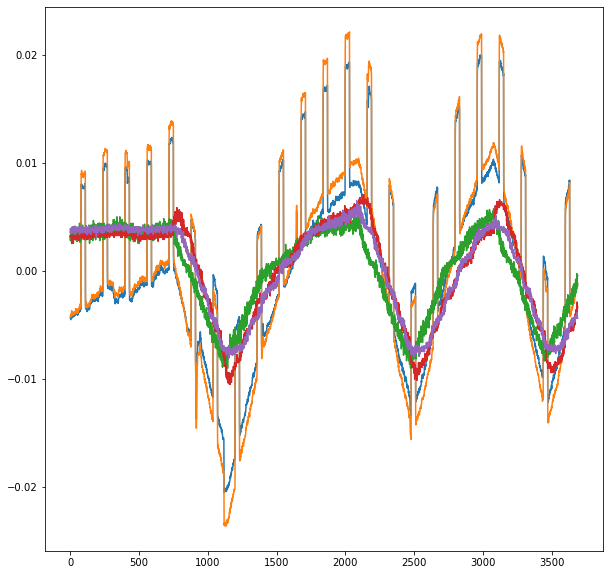

In [9]:
plt.figure(figsize=(10,10))
plt.plot(sig1)
plt.plot(sig2)
plt.plot(-dt1)
plt.plot(-dt2)
plt.plot(-dt3)

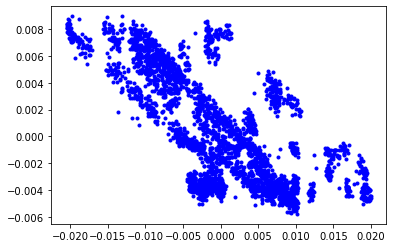

In [10]:
plt.plot (sig1,dt1,'b.')

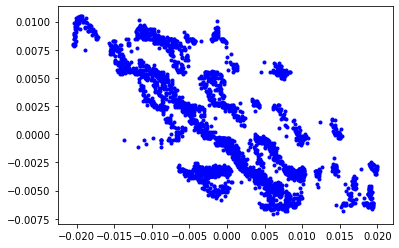

In [11]:
plt.plot (sig1,dt2,'b.')

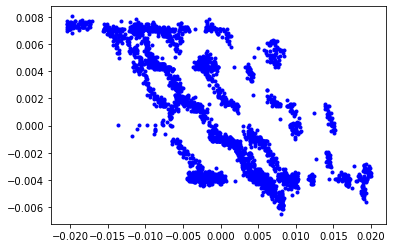

In [12]:
plt.plot (sig1,dt3,'b.')